In [2]:
import pandas as pd
import numpy as np
from skll.metrics import kappa
import pandas as pd
from matplotlib import pyplot as plt
from kappa_loss_perceptron import KappaLossPerceptron
from sklearn.preprocessing import StandardScaler

Playground notebook for KappaLossPerceptron

In [3]:
df = pd.read_csv("./data/preprocessed_data.csv", index_col=0)
TARGET = "NSP"
FEATURES = df.columns.drop(TARGET)
Xdf = df[FEATURES]
ydf = df[TARGET]
NUM_CLASSES = 3

In [4]:
# Without normalizing the data, the optimizer got stuck in local minima
X = StandardScaler().fit(Xdf.values).transform(Xdf.values)
# X = Xdf.values
# need to have the classes start at 0 instead of 1 for scoring to work properly
y = ydf.values - 1  # type: ignore

# Penalties for different types of class confusion
weights = np.array([
# Predicted   N    S    P     # True
            [0.0, 0.5, 0.6],  # N
            [1.0, 0.0, 0.3],  # S
            [2.0, 0.6, 0.0]   # P
])

klp = KappaLossPerceptron(num_classes=NUM_CLASSES, weight_matrix=weights)

In [6]:
klp.fit(X, y, max_iter=10000, verbose=False)#, clean=False)
y_hat = klp.predict(X)
pd.Series(y).hist(alpha=.5) 
pd.Series(y_hat).hist(alpha=.5) 
plt.show()
pd.Series(klp.loss_values).astype(float).plot(title="Learning Curve")
print("Score:", klp.prediction_kappa(X, y))

Stopping early after 779 iterations.


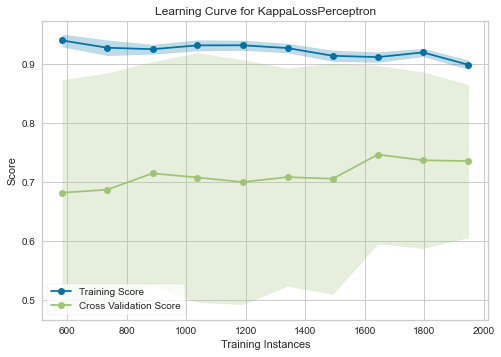

<AxesSubplot:title={'center':'Learning Curve for KappaLossPerceptron'}, xlabel='Training Instances', ylabel='Score'>

In [5]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import make_scorer

def weightedKappa(x, y): return kappa(x, y, weights=weights)
kappaScorer = make_scorer(weightedKappa)


# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
visualizer = LearningCurve(
    klp, cv=cv, scoring=kappaScorer, train_sizes=sizes, n_jobs=-1
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figuremport numpy as np